In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
control_data = pd.read_csv("control_group (1).csv", sep = ";")
test_data = pd.read_csv("test_group.csv", sep = ";")

In [3]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
control_data['Date'] = pd.to_datetime(control_data['Date'], format='%d.%m.%Y', errors='coerce')
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%d.%m.%Y', errors='coerce')

In [6]:
control_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

In [7]:
def calculate_metrics(df):
    df['Click-Through Rate (%)'] = (df['# of Website Clicks'] / df['# of Impressions']) * 100
    df['Conversion Rate (%)'] = (df['# of Purchase'] / df['# of Website Clicks']) * 100
    df['Cost Per Click (USD)'] = df['Spend [USD]'] / df['# of Website Clicks']
    df['Cost Per Purchase (USD)'] = df['Spend [USD]'] / df['# of Purchase']
    return df
control_data = calculate_metrics(control_data)
test_data = calculate_metrics(test_data)

In [8]:
def summary_statistics(df, group_name):
    summary = df[['Click-Through Rate (%)', 'Conversion Rate (%)', 'Cost Per Click (USD)', 'Cost Per Purchase (USD)']].describe()
    summary.loc['mean', :] = df[['Click-Through Rate (%)', 'Conversion Rate (%)', 'Cost Per Click (USD)', 'Cost Per Purchase (USD)']].mean()
    summary.loc['std', :] = df[['Click-Through Rate (%)', 'Conversion Rate (%)', 'Cost Per Click (USD)', 'Cost Per Purchase (USD)']].std()
    summary['count'] = df[['Click-Through Rate (%)', 'Conversion Rate (%)', 'Cost Per Click (USD)', 'Cost Per Purchase (USD)']].count()
    summary.index.name = group_name
    return summary

control_summary = summary_statistics(control_data, 'Control Group')
test_summary = summary_statistics(test_data, 'Test Group')

In [9]:
control_summary

,Click-Through Rate (%),Conversion Rate (%),Cost Per Click (USD),Cost Per Purchase (USD),count
Control Group,,,,,
count,29.000000,29.000000,30.000000,30.000000,NaN
mean,5.095871,11.477203,inf,inf,NaN
std,2.050769,6.838270,NaN,NaN,NaN
min,1.857546,3.349427,0.216646,2.253750,NaN
25%,3.618618,6.300863,0.336346,3.445931,NaN
50%,4.720190,10.227453,0.423306,4.705336,NaN
75%,6.700264,14.383856,0.616361,6.907681,NaN
max,8.830912,32.235397,inf,inf,NaN


In [10]:
test_summary

,Click-Through Rate (%),Conversion Rate (%),Cost Per Click (USD),Cost Per Purchase (USD),count
Test Group,,,,,
count,30.000000,30.000000,30.000000,30.000000,NaN
mean,10.242260,9.231182,0.468718,5.899589,NaN
std,6.770897,4.448987,0.178566,2.800766,NaN
min,2.982351,3.008850,0.248799,2.428571,NaN
25%,5.313017,6.568272,0.331836,3.725002,NaN
50%,8.035887,8.454291,0.448842,5.062840,NaN
75%,12.849262,11.668361,0.595935,7.718778,NaN
max,33.821766,21.085051,0.990125,12.702041,NaN


In [11]:
def compare_metrics(control, test):
    results = {}
    
    for metric in ['Click-Through Rate (%)', 'Conversion Rate (%)', 'Cost Per Click (USD)', 'Cost Per Purchase (USD)']:
        control_mean = control[metric].mean()
        test_mean = test[metric].mean()
        
        control_std = control[metric].std()
        test_std = test[metric].std()
        
        t_stat, p_value = stats.ttest_ind(control[metric], test[metric], nan_policy='omit')
        
        results[metric] = {
            'Control Mean': control_mean,
            'Test Mean': test_mean,
            'Control Std': control_std,
            'Test Std': test_std,
            'T-Statistic': t_stat,
            'P-Value': p_value
        }
        
    return results

comparison_results = compare_metrics(control_data, test_data)
print(pd.DataFrame(comparison_results).T)

                         Control Mean  Test Mean  Control Std  Test Std  \
Click-Through Rate (%)       5.095871  10.242260     2.050769  6.770897   
Conversion Rate (%)         11.477203   9.231182     6.838270  4.448987   
Cost Per Click (USD)              inf   0.468718          NaN  0.178566   
Cost Per Purchase (USD)           inf   5.899589          NaN  2.800766   

                         T-Statistic   P-Value  
Click-Through Rate (%)     -3.921928  0.000238  
Conversion Rate (%)         1.500445  0.139018  
Cost Per Click (USD)             NaN       NaN  
Cost Per Purchase (USD)          NaN       NaN  


C:\Users\SWATHY KRISHNA\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


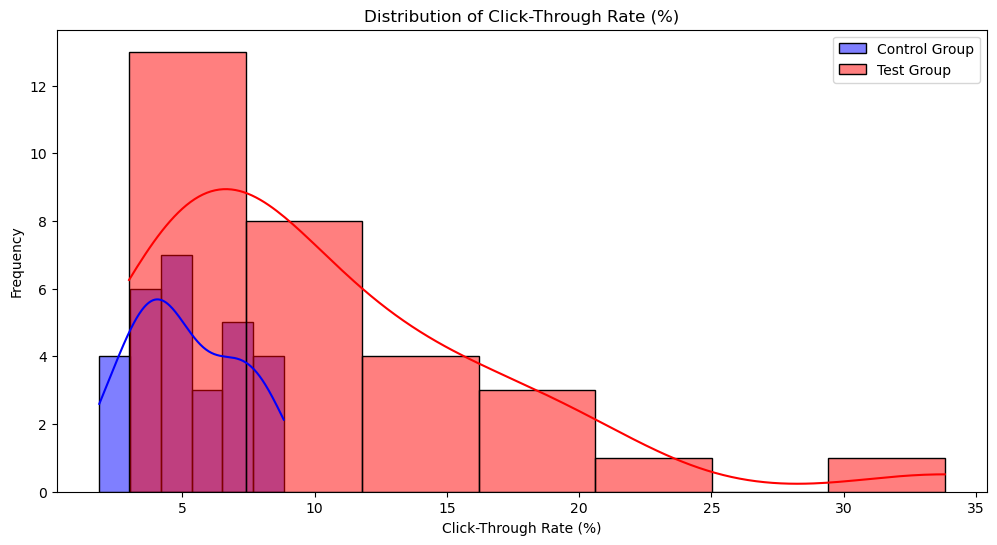

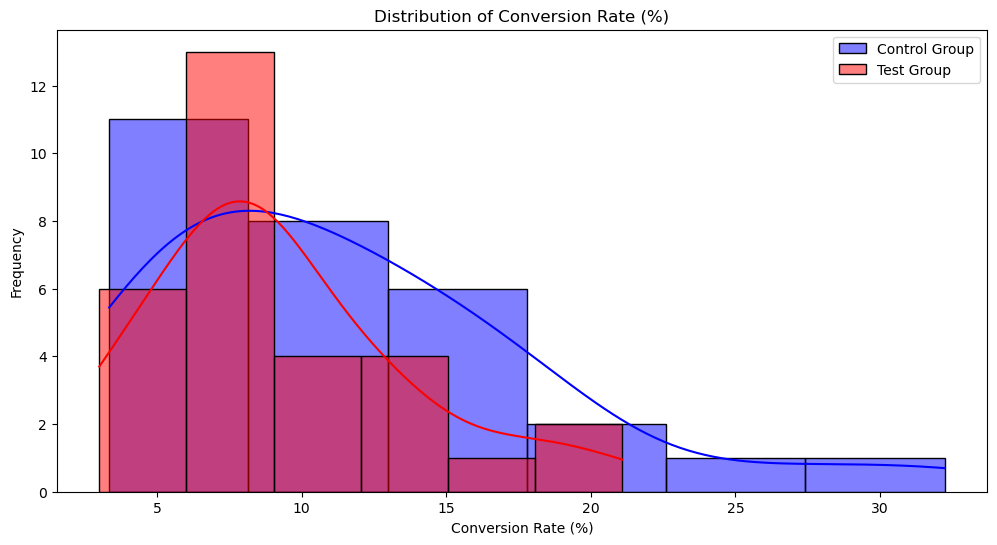

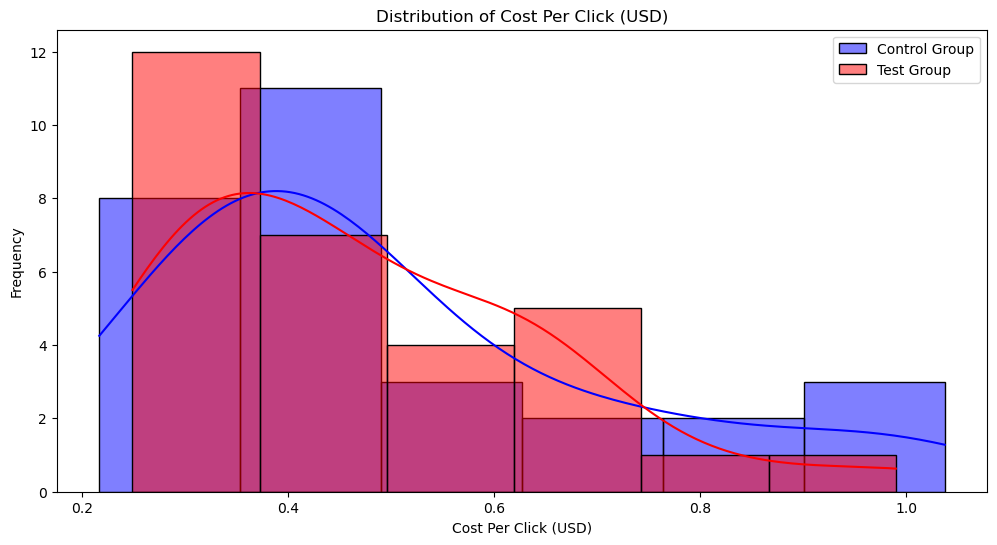

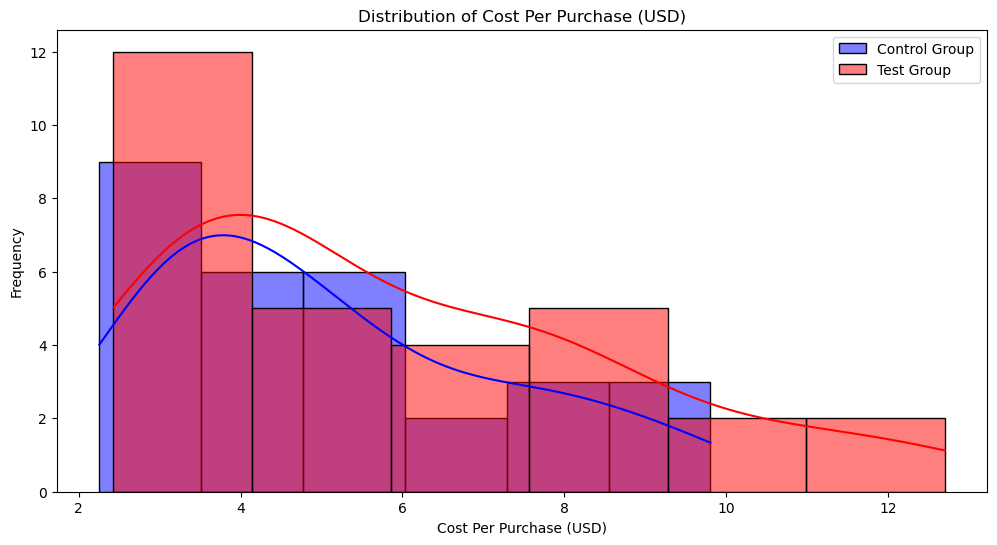

In [12]:
def plot_comparison(control, test, metric):
    plt.figure(figsize=(12, 6))
    sns.histplot(control[metric], color='blue', label='Control Group', kde=True)
    sns.histplot(test[metric], color='red', label='Test Group', kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
for metric in ['Click-Through Rate (%)', 'Conversion Rate (%)', 'Cost Per Click (USD)', 'Cost Per Purchase (USD)']:
    plot_comparison(control_data, test_data, metric) 

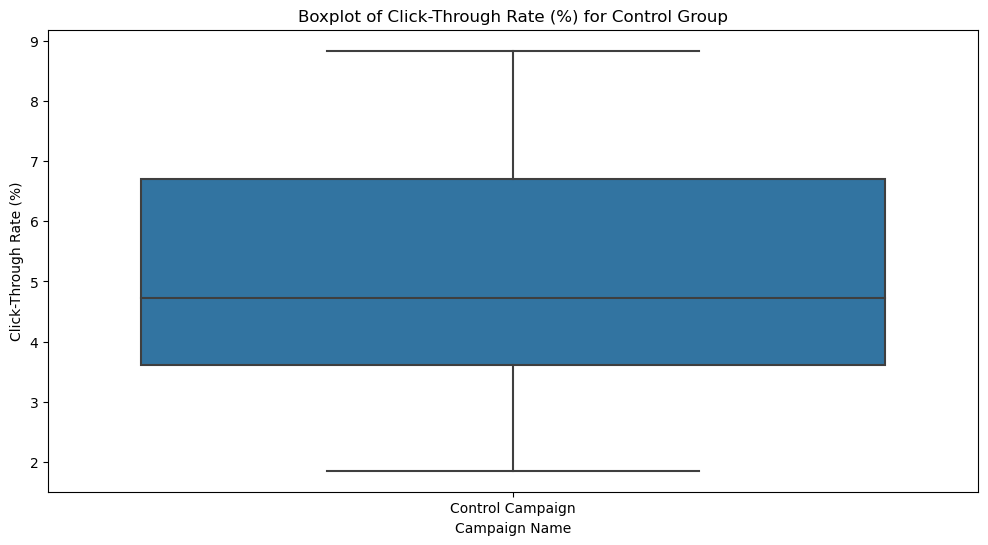

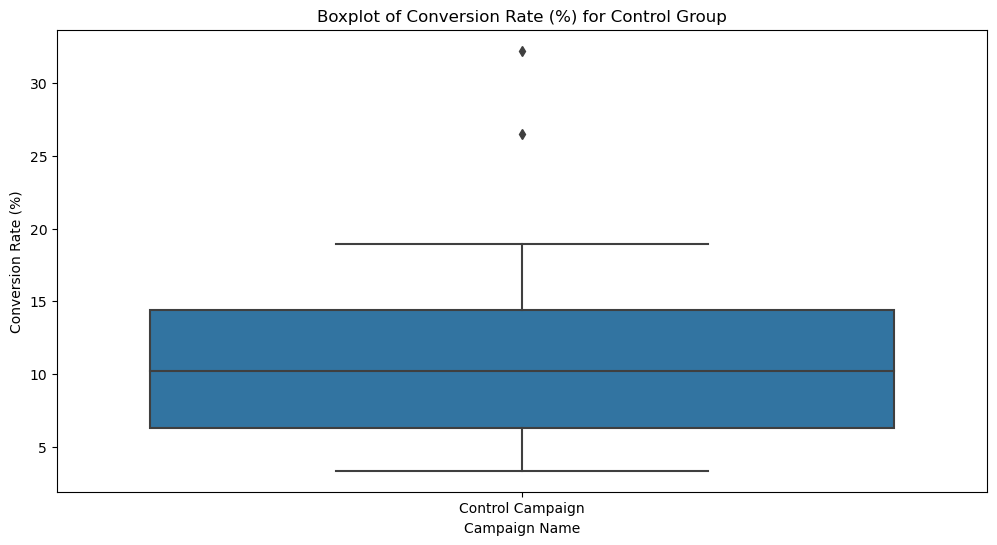

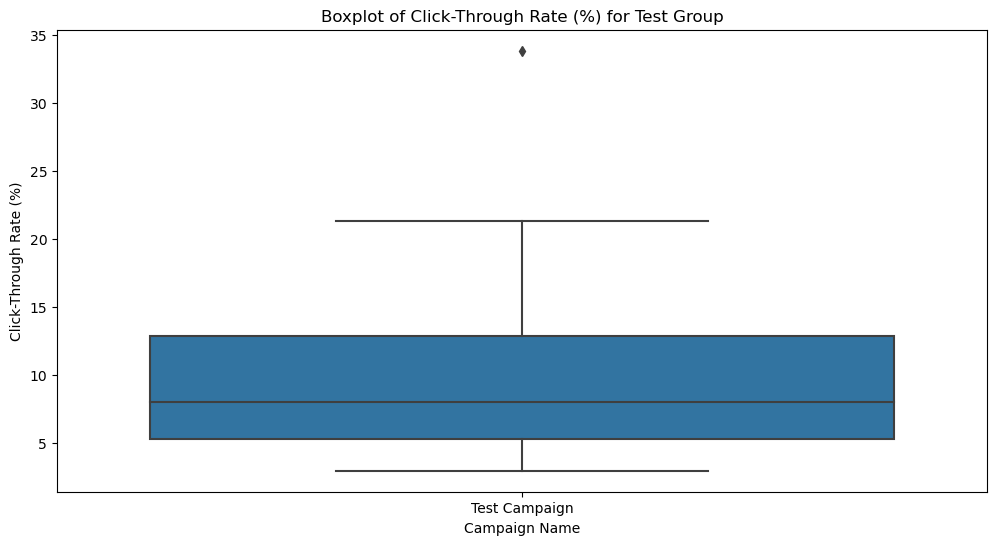

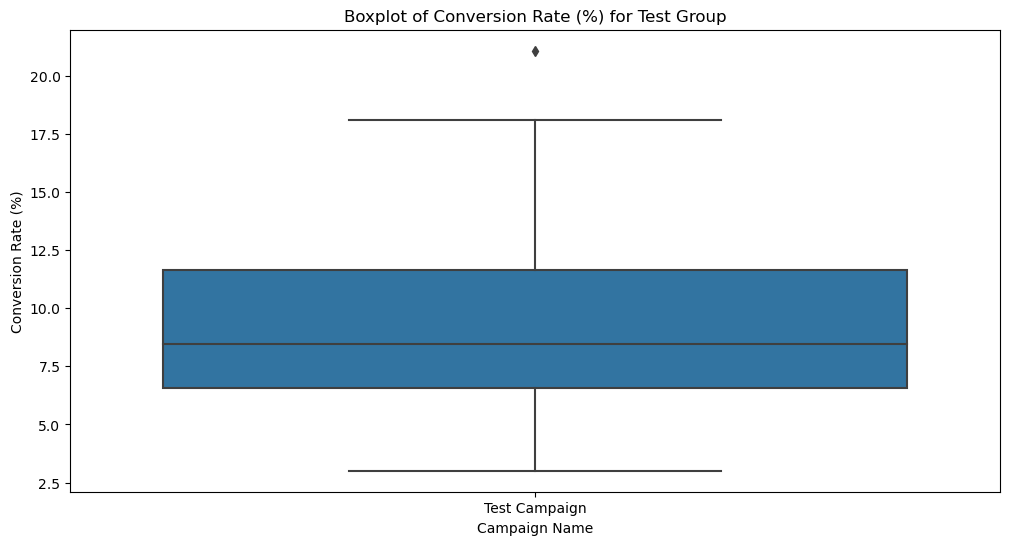

In [13]:
def additional_analysis(df, group_name):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Campaign Name', y='Click-Through Rate (%)', data=df)
    plt.title(f'Boxplot of Click-Through Rate (%) for {group_name}')
    plt.xlabel('Campaign Name')
    plt.ylabel('Click-Through Rate (%)')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Campaign Name', y='Conversion Rate (%)', data=df)
    plt.title(f'Boxplot of Conversion Rate (%) for {group_name}')
    plt.xlabel('Campaign Name')
    plt.ylabel('Conversion Rate (%)')
    plt.show()

additional_analysis(control_data, 'Control Group')
additional_analysis(test_data, 'Test Group')

In [14]:
def summarize_insights(comparison_results):
    for metric, results in comparison_results.items():
        print(f"Metric: {metric}")
        print(f"Control Mean: {results['Control Mean']:.2f}")
        print(f"Test Mean: {results['Test Mean']:.2f}")
        print(f"T-Statistic: {results['T-Statistic']:.2f}")
        print(f"P-Value: {results['P-Value']:.4f}")
        
        if results['P-Value'] < 0.05:
            print(f"Statistical significance detected for {metric}.")
        else:
            print(f"No statistical significance detected for {metric}.")
        print()

summarize_insights(comparison_results)

Metric: Click-Through Rate (%)
Control Mean: 5.10
Test Mean: 10.24
T-Statistic: -3.92
P-Value: 0.0002
Statistical significance detected for Click-Through Rate (%).

Metric: Conversion Rate (%)
Control Mean: 11.48
Test Mean: 9.23
T-Statistic: 1.50
P-Value: 0.1390
No statistical significance detected for Conversion Rate (%).

Metric: Cost Per Click (USD)
Control Mean: inf
Test Mean: 0.47
T-Statistic: nan
P-Value: nan
No statistical significance detected for Cost Per Click (USD).

Metric: Cost Per Purchase (USD)
Control Mean: inf
Test Mean: 5.90
T-Statistic: nan
P-Value: nan
No statistical significance detected for Cost Per Purchase (USD).

